##**Load Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import STL

# Load data
data = pd.read_csv("/content/Electric_Production.csv", parse_dates=['DATE'], index_col='DATE')
data = data.rename(columns={"IPG2211A2N": "Electric_Production"})
data.head()

,Electric_Production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


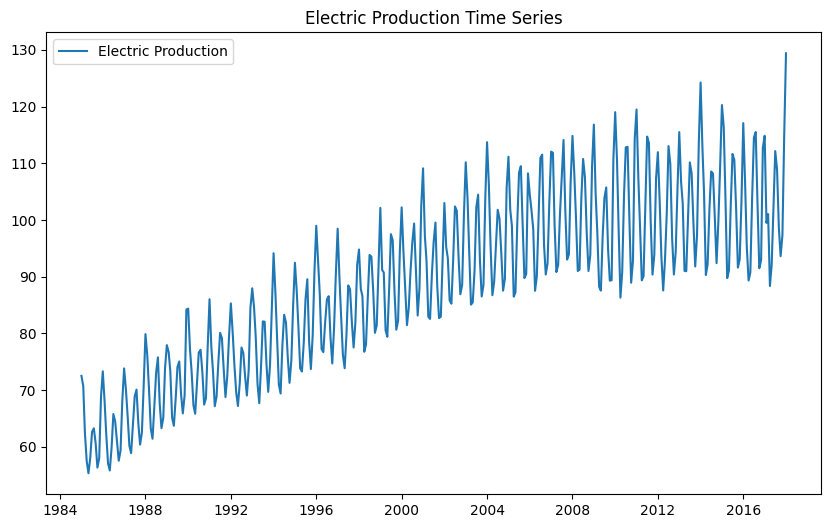

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data, label="Electric Production")
plt.title("Electric Production Time Series")
plt.legend()
plt.show()

##**STL Decomposition**

<Figure size 1200x1000 with 0 Axes>

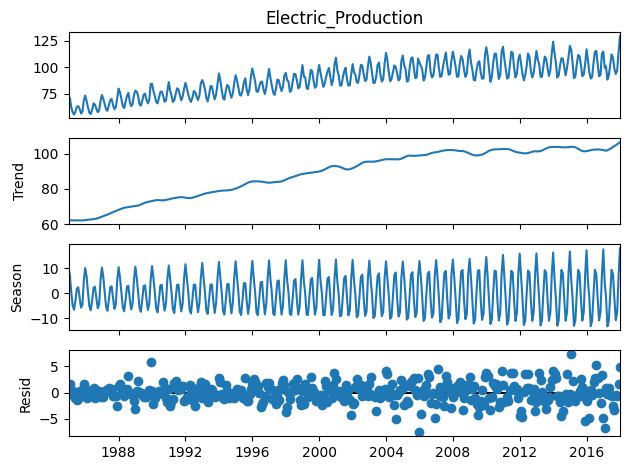

In [ ]:
# STL Decomposition
plt.figure(figsize=(12, 10))
stl = STL(data['Electric_Production'], seasonal=13)
result = stl.fit()

# Plot the components
result.plot()
plt.show()

##**Moving Average (MA) Method**

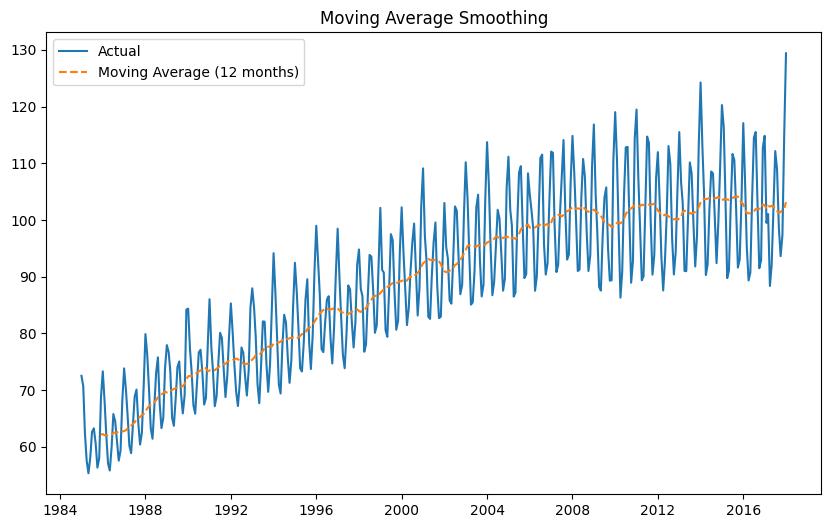

In [ ]:
# Moving Average with a window of 12 (monthly data)
ma_model = data['Electric_Production'].rolling(window=12).mean()

# Plot Actual vs MA
plt.figure(figsize=(10, 6))
plt.plot(data, label="Actual")
plt.plot(ma_model, label="Moving Average (12 months)", linestyle="--")
plt.title("Moving Average Smoothing")
plt.legend()
plt.show()

##**Exponential Smoothing**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


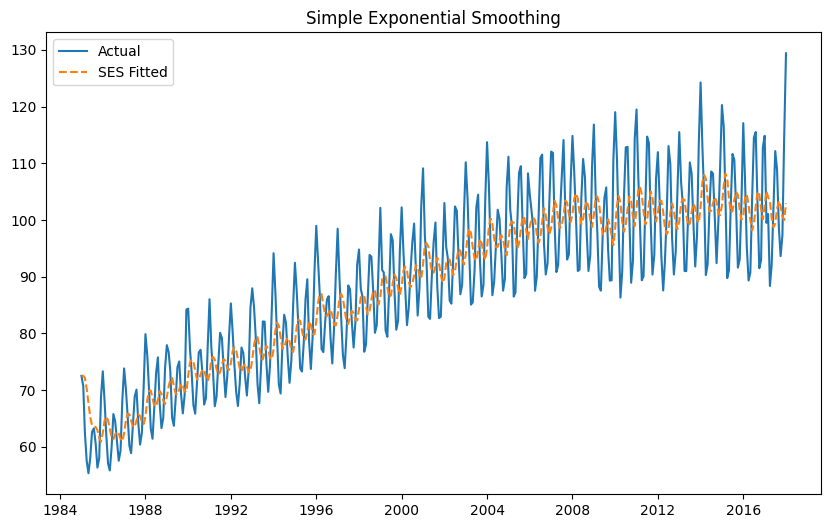

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(data['Electric_Production']).fit(smoothing_level=0.2, optimized=True)
ses_fitted = ses_model.fittedvalues

# Plot Actual vs Fitted
plt.figure(figsize=(10, 6))
plt.plot(data, label="Actual")
plt.plot(ses_fitted, label="SES Fitted", linestyle="--")
plt.title("Simple Exponential Smoothing")
plt.legend()
plt.show()

##**Holt's Linear Trend Method**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-12-1d30b04ecc76>:4: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(data['Electric_Production']).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=True)
/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


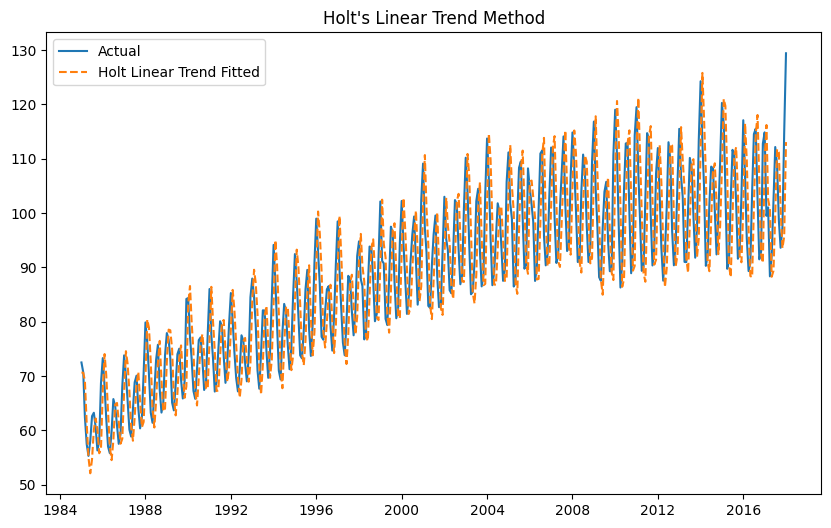

In [ ]:
from statsmodels.tsa.holtwinters import Holt

# Holt Linear Trend
holt_model = Holt(data['Electric_Production']).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=True)
holt_fitted = holt_model.fittedvalues

# Plot Actual vs Fitted
plt.figure(figsize=(10, 6))
plt.plot(data, label="Actual")
plt.plot(holt_fitted, label="Holt Linear Trend Fitted", linestyle="--")
plt.title("Holt's Linear Trend Method")
plt.legend()
plt.show()

##**Holt-Winters**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


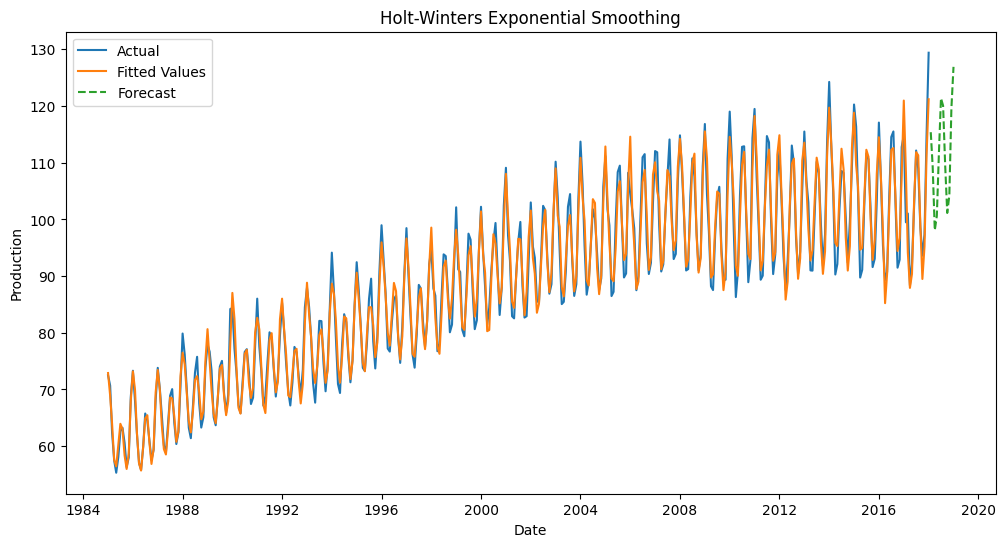

In [ ]:
#Apply Exponential Smoothing (Holt-Winters Method)
model = ExponentialSmoothing(data['Electric_Production'], trend='add', seasonal='add', seasonal_periods=12)
fit_model = model.fit()

# Forecast Future Values
forecast = fit_model.forecast(steps=12)

# Step 6: Plot Actual vs Fitted and Forecasted Values
plt.figure(figsize=(12, 6))
plt.plot(data, label="Actual")
plt.plot(fit_model.fittedvalues, label="Fitted Values")
plt.plot(forecast, label="Forecast", linestyle="--")
plt.title("Holt-Winters Exponential Smoothing")
plt.xlabel("Date")
plt.ylabel("Production")
plt.legend()
plt.show()
